In [2]:
#TCR INNOVATION
#Anti-Phishing Prediction



In [3]:
#Importing Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,recall_score,precision_score,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Loading the Dataset
df1=pd.read_csv('/content/drive/MyDrive/Phishing_Legitimate_full.csv')
df1

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [6]:
df=df1.drop(['id'], axis=1)
df

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,2,1,4,59,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,2,1,4,57,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,3,1,1,49,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [7]:
df.head() #Displaying first 5 rows

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [8]:
df.tail() #Displaying last 5 rows

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
9995,3,1,1,50,0,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,2,1,4,59,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,2,1,4,57,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,3,1,1,49,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
9999,3,1,2,52,3,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,0


#Performing EDA

In [9]:
df.shape #returns rows and columns

(10000, 49)

In [10]:
df.dtypes

NumDots                                 int64
SubdomainLevel                          int64
PathLevel                               int64
UrlLength                               int64
NumDash                                 int64
NumDashInHostname                       int64
AtSymbol                                int64
TildeSymbol                             int64
NumUnderscore                           int64
NumPercent                              int64
NumQueryComponents                      int64
NumAmpersand                            int64
NumHash                                 int64
NumNumericChars                         int64
NoHttps                                 int64
RandomString                            int64
IpAddress                               int64
DomainInSubdomains                      int64
DomainInPaths                           int64
HttpsInHostname                         int64
HostnameLength                          int64
PathLength                        

In [11]:
df.columns

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NumDots,10000.0,2.445100,1.346836,1.0,2.000000,2.000000,3.000000,21.0
SubdomainLevel,10000.0,0.586800,0.751214,0.0,0.000000,1.000000,1.000000,14.0
PathLevel,10000.0,3.300300,1.863241,0.0,2.000000,3.000000,4.000000,18.0
UrlLength,10000.0,70.264100,33.369877,12.0,48.000000,62.000000,84.000000,253.0
NumDash,10000.0,1.818000,3.106258,0.0,0.000000,0.000000,2.000000,55.0
NumDashInHostname,10000.0,0.138900,0.545744,0.0,0.000000,0.000000,0.000000,9.0
AtSymbol,10000.0,0.000300,0.017319,0.0,0.000000,0.000000,0.000000,1.0
TildeSymbol,10000.0,0.013100,0.113709,0.0,0.000000,0.000000,0.000000,1.0
NumUnderscore,10000.0,0.323200,1.114660,0.0,0.000000,0.000000,0.000000,18.0
NumPercent,10000.0,0.073800,0.622248,0.0,0.000000,0.000000,0.000000,19.0


In [14]:
#Searching for null values
df.isnull().sum()

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0


In [15]:
#CHECKING FOR DUPLICATE VALUES
df.duplicated() 

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [16]:
df.CLASS_LABEL.value_counts() #displaying n.o of legitimate & fraud transactions

1    5000
0    5000
Name: CLASS_LABEL, dtype: int64

**PLOTS**

Text(0, 0.5, 'Count')

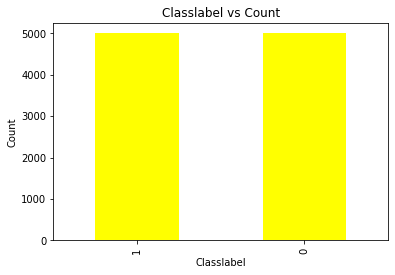

In [17]:
#count plot
df['CLASS_LABEL'].value_counts().plot(kind='bar',color="yellow")
plt.title('Classlabel vs Count')
plt.xlabel('Classlabel')
plt.ylabel('Count')

In [18]:
def heatmap(df,f_p,l_p):
    latest_data=pd.DataFrame(df.iloc[:,f_p:l_p])
    plt.figure(figsize=(10,9))
    sns.heatmap(latest_data.corr(),annot=True,fmt='.2f')

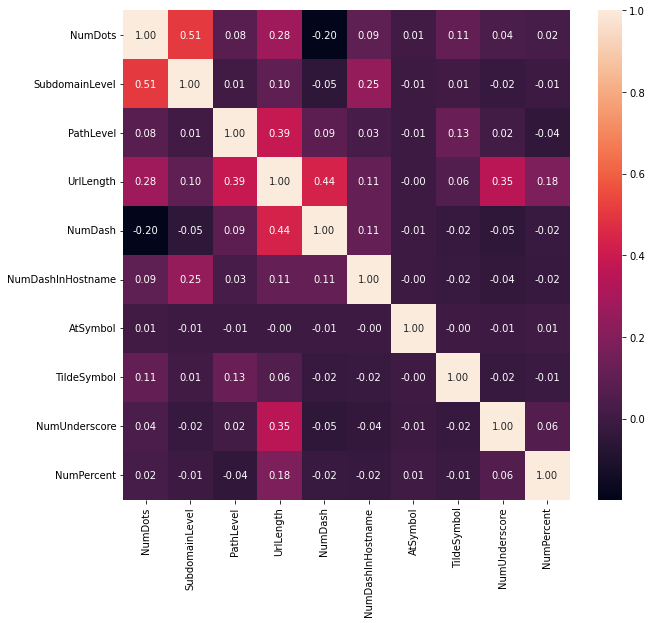

In [19]:
#Heatmap 
heatmap(df,0,10)

In [20]:
#Performing Univariate Analysis
def univariate_analysis(df, feature):
    total = len(df[feature])
    count = df[feature].nunique()
    plt.figure(figsize=(count+1, 5))
    plt.xticks(rotation = 90, fontsize=18)
    ax = sns.countplot(data=df, x=feature, palette='coolwarm', order = \
        df[feature].value_counts().index.sort_values(ascending = False))
    for p in ax.patches:
        label = "{:.1f}%".format(100*p.get_height()/total)
        x = p.get_x()+p.get_width()/2
        y = p.get_height()
        ax.annotate(label, (x,y), ha="center", va="center", size=12, xytext=(0,5), textcoords="offset points")
    plt.show()

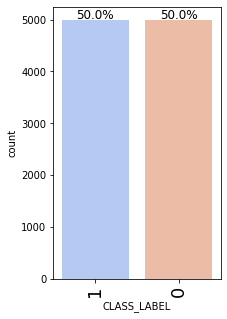

In [21]:
univariate_analysis(df, 'CLASS_LABEL')

In [22]:
#Performing bivariate analysis
def bivariate_analysis(df, feature_coll):
    plt.figure(figsize=(15,10))
    for i, var in enumerate(feature_coll):
        plt.subplot(3,2, i+1)
        sns.boxplot(df['CLASS_LABEL'], df[var], palette='Reds_r')
        plt.tight_layout()
        plt.title('Class Label vs '+var)
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

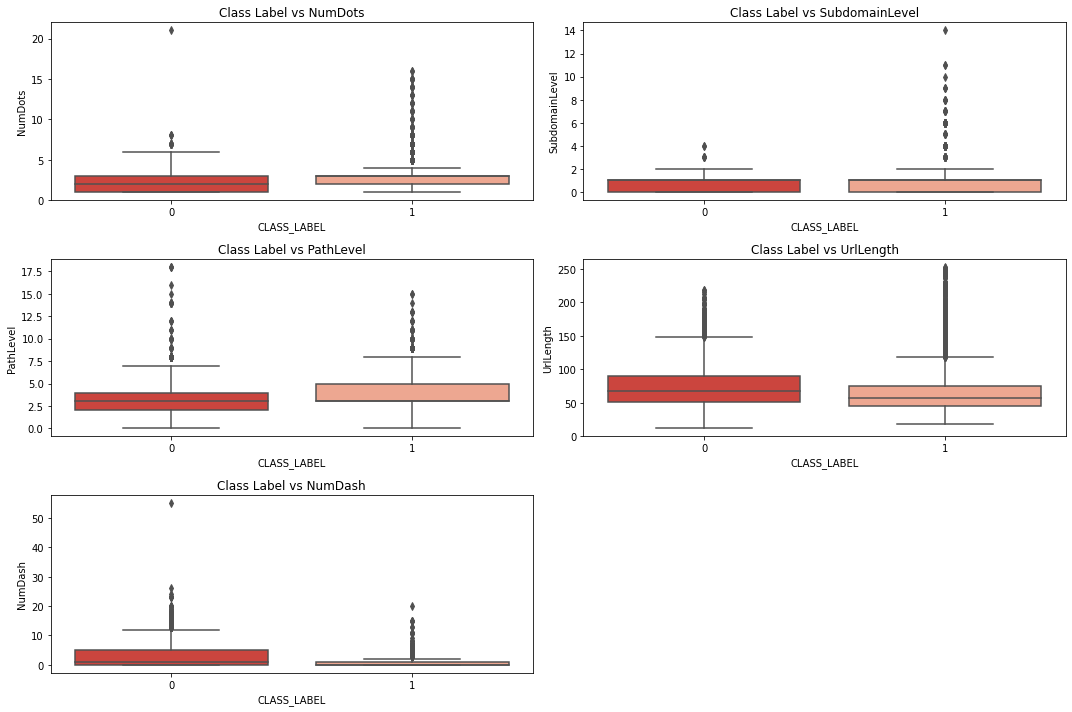

In [23]:
bivariate_analysis(df, ['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',])

In [26]:
df.corr()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
NumDots,1.000000,0.507992,0.079202,0.277380,-0.198769,0.093034,0.011425,0.109508,0.038068,0.022616,...,-0.117210,0.045291,-0.012244,-0.343927,-0.151756,0.047821,0.032276,0.035586,-0.153835,0.294111
SubdomainLevel,0.507992,1.000000,0.007277,0.098579,-0.050018,0.246368,-0.005845,0.009518,-0.023593,-0.006003,...,-0.001061,0.026432,-0.008830,-0.679687,-0.086943,0.059584,-0.030790,0.093623,-0.034866,0.043132
PathLevel,0.079202,0.007277,1.000000,0.390456,0.090503,0.027626,-0.005891,0.127291,0.015719,-0.043529,...,0.000701,-0.027880,-0.002279,-0.024815,-0.399710,-0.000903,0.040901,0.064222,-0.095786,0.229450
UrlLength,0.277380,0.098579,0.390456,1.000000,0.437313,0.111980,-0.003425,0.058233,0.350756,0.184947,...,0.033192,-0.053222,-0.036766,-0.133533,-0.800096,0.002019,-0.025366,-0.000860,0.142819,-0.074493
NumDash,-0.198769,-0.050018,0.090503,0.437313,1.000000,0.113200,-0.010139,-0.024395,-0.050195,-0.017938,...,0.228154,-0.064450,-0.006314,-0.023363,-0.468798,-0.137093,-0.085238,-0.122579,0.184808,-0.372235
NumDashInHostname,0.093034,0.246368,0.027626,0.111980,0.113200,1.000000,-0.004409,-0.018043,-0.035170,-0.021648,...,0.040743,-0.010096,-0.007712,-0.359595,-0.097446,0.079631,0.038776,0.070111,-0.113745,0.150444
AtSymbol,0.011425,-0.005845,-0.005891,-0.003425,-0.010139,-0.004409,1.000000,-0.001996,-0.005023,0.007226,...,-0.012422,-0.003160,-0.003067,0.003031,-0.007469,-0.006885,-0.004207,0.011307,0.013235,-0.017323
TildeSymbol,0.109508,0.009518,0.127291,0.058233,-0.024395,-0.018043,-0.001996,1.000000,-0.022361,-0.013665,...,-0.039905,-0.011051,-0.020400,0.016614,-0.036087,0.022478,0.022098,0.058519,-0.000144,0.095864
NumUnderscore,0.038068,-0.023593,0.015719,0.350756,-0.050195,-0.035170,-0.005023,-0.022361,1.000000,0.061638,...,-0.010341,-0.019348,-0.019467,0.003353,-0.257480,0.014952,-0.053835,-0.047775,0.100214,-0.098869
NumPercent,0.022616,-0.006003,-0.043529,0.184947,-0.017938,-0.021648,0.007226,-0.013665,0.061638,1.000000,...,-0.021592,-0.011620,-0.006960,0.007147,-0.125811,0.021022,-0.001660,0.018508,0.035300,-0.068465


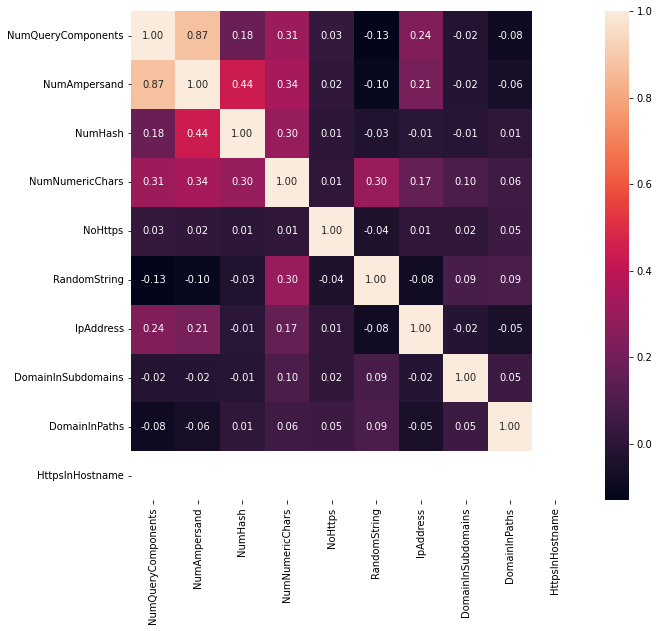

In [27]:
heatmap(df,10,20)

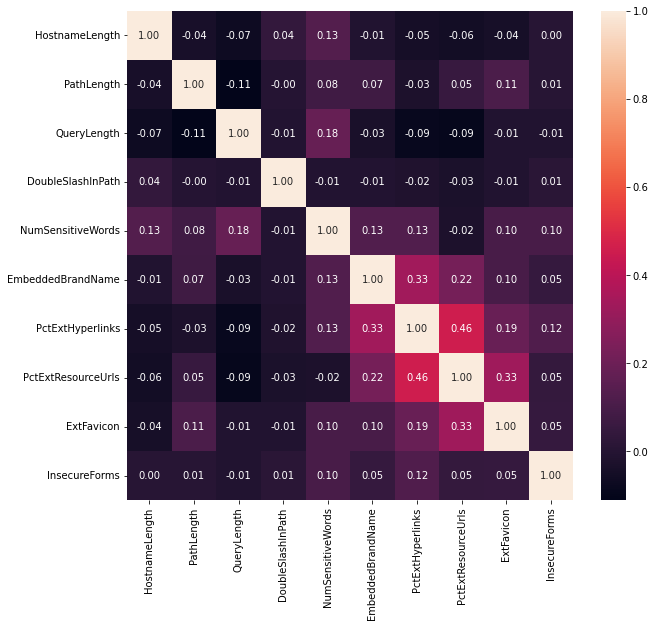

In [28]:
heatmap(df,20,30)

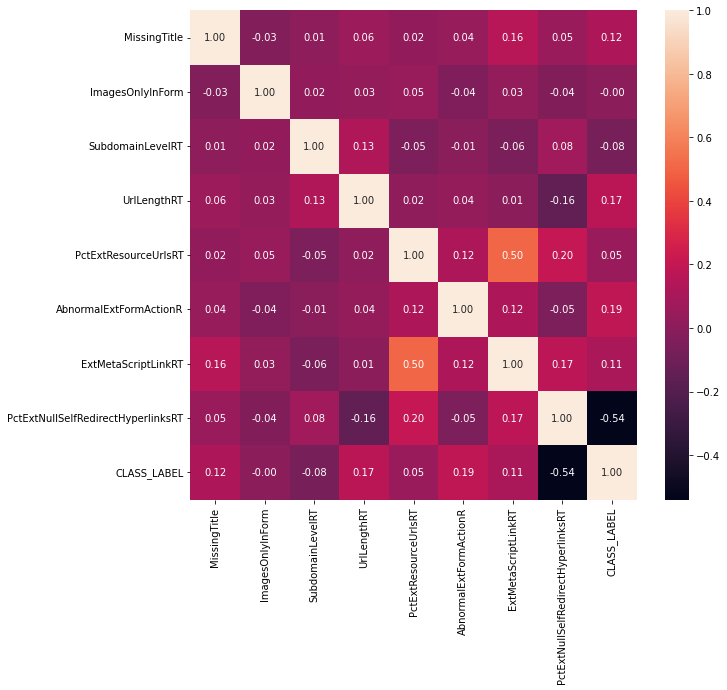

In [29]:
heatmap(df,40,50)

# Performing Train Test Split


In [30]:
x=df.drop(columns=['CLASS_LABEL'],axis=1)
y=df['CLASS_LABEL']

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [32]:
x_train

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
1309,3,1,1,38,0,0,0,0,0,0,...,0,0,0,0,1,1,-1,0,-1,-1
8016,1,0,5,66,3,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2795,2,0,2,41,0,0,0,0,0,0,...,0,1,0,0,1,1,-1,1,-1,-1
9227,3,1,2,44,2,1,0,0,0,0,...,1,0,0,0,1,1,1,1,1,1
7094,1,0,3,83,8,0,0,0,0,0,...,0,0,0,0,1,-1,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,2,1,2,74,0,0,0,0,1,0,...,0,0,0,0,1,0,1,1,0,1
3603,3,2,4,109,5,4,0,0,0,0,...,0,1,0,0,0,-1,1,1,1,-1
5959,2,0,5,62,1,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,1
5426,2,1,7,74,4,0,0,0,0,0,...,0,1,0,0,1,0,1,-1,0,1


In [33]:
x_test

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
293,1,0,3,60,0,0,0,0,1,0,...,0,0,0,1,1,0,1,1,1,-1
1244,2,0,2,36,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
7353,4,1,1,68,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0
5145,1,0,2,67,2,0,0,0,0,0,...,0,0,0,0,1,0,-1,1,0,1
1618,2,0,3,43,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4483,2,0,2,37,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,-1
9572,2,1,1,48,0,0,0,0,4,0,...,1,0,0,0,1,1,-1,-1,0,1
5853,1,0,6,105,11,0,0,0,0,0,...,1,1,0,0,1,-1,-1,1,-1,0
1522,2,0,3,42,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


In [34]:
y_train

1309    1
8016    0
2795    1
9227    0
7094    0
       ..
7839    0
3603    1
5959    0
5426    0
7608    0
Name: CLASS_LABEL, Length: 7000, dtype: int64

In [35]:
y_test

293     1
1244    1
7353    0
5145    0
1618    1
       ..
4483    1
9572    0
5853    0
1522    1
467     1
Name: CLASS_LABEL, Length: 3000, dtype: int64

In [36]:
#ALGORITHMS 

# XGBoost

In [37]:
#Using XGBoost Classifier
from xgboost import XGBClassifier
model1=XGBClassifier()
model1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [38]:
#Predicting the values for x_test
y_pred=model1.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [39]:
#Predicting the values for corresponding x_train
y_pred_train=model1.predict(x_train)

CHECKING CORRECTNESS

In [40]:
mean_absolute_error(y_test,y_pred)

0.014

In [41]:
#MSE value
mean_squared_error(y_test,y_pred)

0.014

In [42]:
#RMSE value
mean_squared_error(y_test,y_pred,squared=False)

0.11832159566199232

In [43]:
# Calculating Recall
recall_score(y_test,y_pred)

0.9857239972807614

In [44]:
# Calculating Precision
precision_score(y_test,y_pred)

0.9857239972807614

In [45]:
# Calculating Accuracy
accuracy_score(y_test,y_pred)

0.986

In [46]:
# Calculating Confusion Matrix

confusion_matrix(y_test,y_pred)

array([[1508,   21],
       [  21, 1450]])

In [47]:
#Accuracy for training data
accuracy_score(y_train,y_pred_train)

1.0

In [48]:
confusion_matrix(y_train,y_pred_train)

array([[3471,    0],
       [   0, 3529]])

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1529
           1       0.99      0.99      0.99      1471

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [50]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Random Forest Classification

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
y_pred_1=rf.predict(x_test)
y_pred_1_train=rf.predict(x_train)

In [53]:
confusion_matrix(y_test,y_pred_1)

array([[1498,   31],
       [  28, 1443]])

In [54]:
recall_score(y_test,y_pred_1)

0.9809653297076818

In [55]:
precision_score(y_test,y_pred_1)

0.9789687924016283

In [56]:
mean_absolute_error(y_test,y_pred_1)

0.019666666666666666

In [57]:
mean_squared_error(y_test,y_pred_1)

0.019666666666666666

In [58]:
mean_squared_error(y_test,y_pred_1,squared=False)

0.14023789311975085

In [59]:
accuracy_score(y_test,y_pred_1)

0.9803333333333333

In [60]:
accuracy_score(y_train,y_pred_1_train)

1.0

In [61]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1529
           1       0.98      0.98      0.98      1471

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [62]:
confusion_matrix(y_train,y_pred_1_train)

array([[3471,    0],
       [   0, 3529]])